# Evaluierung

## Korrelation

Heart Rate Accuracy: 0.11
Heart Rate Precision: 0.19
Heart Rate F1-Score: 0.12
Respiratory Rate Accuracy: 0.41
Respiratory Rate Precision: 0.34
Respiratory Rate F1-Score: 0.43
Sleep Phase Accuracy: 0.41
Sleep Phase Precision: 0.32
Sleep Phase F1-Score: 0.42

hr_s: 62.0 hr_w: 60.0
rr_s: 17.0 rr_w: 14.0
deep_s: 103 deep_w: 66
light_s: 213 light_w: 223
rem_s: 94 rem_w: 111
awake_s: 6 awake_w: 16


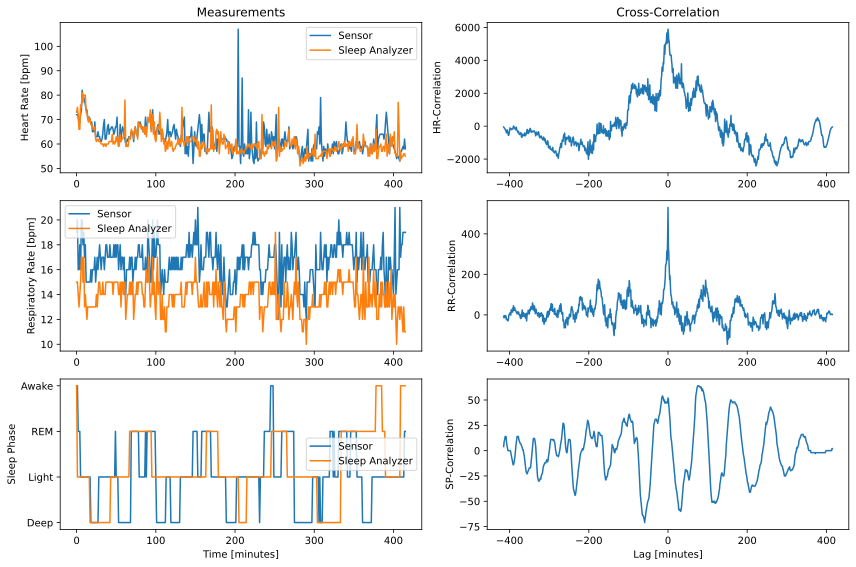

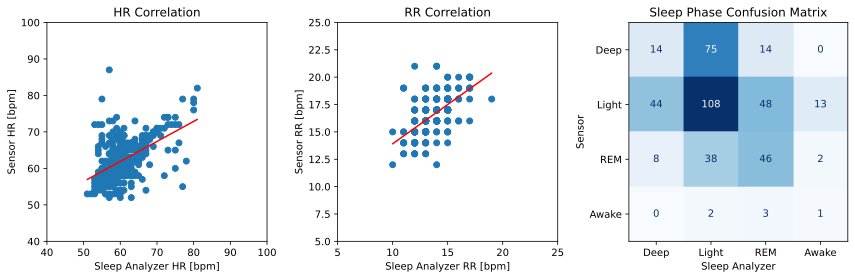

In [8]:
date = "29112021"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as skm
%config InlineBackend.figure_format = 'svg'
df_sensor = pd.read_csv("Sensordata/clean/" + date + "_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/" + date + "_withings_data")
sensor_cut_start = 15
sensor_cut_end = -15
offset = 62
hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
hr_s_norm = hr_sensor[sensor_cut_start:sensor_cut_end] - np.median(hr_sensor[sensor_cut_start:sensor_cut_end])
hr_w_norm = hr_withings[offset:len(hr_s_norm)+offset] - np.median(hr_withings[offset:len(hr_s_norm)+offset])
hr_s_clipped = hr_sensor[sensor_cut_start:sensor_cut_end]
hr_w_clipped = hr_withings[offset:len(hr_s_clipped)+offset]
cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.figure(figsize=(12,8))
plt.subplot(321, title="Measurements", ylabel="Heart Rate [bpm]")
plt.plot(hr_s_clipped, label="Sensor")
plt.plot(hr_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.subplot(322, title="Cross-Correlation", ylabel="HR-Correlation")
plt.plot(x_vals, cross_corr)
a_offset_hr = cross_corr.index(max(cross_corr))-int(len(cross_corr)/2)
rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
rr_s_norm = rr_sensor[sensor_cut_start:sensor_cut_end] - np.median(rr_sensor[sensor_cut_start:sensor_cut_end])
rr_w_norm = rr_withings[offset:len(rr_s_norm)+offset] - np.median(rr_withings[offset:len(rr_s_norm)+offset])
rr_s_clipped = rr_sensor[sensor_cut_start:sensor_cut_end]
rr_w_clipped = rr_withings[offset:len(rr_s_clipped)+offset]
cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.subplot(323, ylabel="Respiratory Rate [bpm]")
plt.plot(rr_s_clipped, label="Sensor")
plt.plot(rr_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.subplot(324, ylabel="RR-Correlation")
plt.plot(x_vals, cross_corr)
a_offset_rr = cross_corr.index(max(cross_corr))-int(len(cross_corr)/2)
# Sleep stage offset
offset = offset + 20
ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
ss_s_norm = ss_sensor[sensor_cut_start:sensor_cut_end] - np.median(ss_sensor[sensor_cut_start:sensor_cut_end])
ss_w_norm = ss_withings[offset:len(ss_s_norm)+offset] - np.median(ss_withings[offset:len(ss_s_norm)+offset])
ss_s_clipped = ss_sensor[sensor_cut_start:sensor_cut_end]
ss_w_clipped = ss_withings[offset:len(ss_s_clipped)+offset]
cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.subplot(325, xlabel="Time [minutes]", ylabel="Sleep Phase")
plt.plot(ss_s_clipped, label="Sensor")
plt.plot(ss_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.yticks([1,2,3,4],["Deep","Light","REM","Awake"])
plt.subplot(326,xlabel="Lag [minutes]", ylabel="SP-Correlation")
plt.plot(x_vals, cross_corr)
plt.tight_layout()
plt.show
a_offset_ss = cross_corr.index(max(cross_corr))-int(len(cross_corr)/2)
print(f"Heart Rate Accuracy: {skm.accuracy_score(hr_w_norm, hr_s_norm):.2f}")
print(f"Heart Rate Precision: {skm.precision_score(hr_w_norm, hr_s_norm, average='macro', zero_division=1):.2f}")
print(f"Heart Rate F1-Score: {skm.f1_score(hr_w_norm, hr_s_norm, average='weighted'):.2f}")
print(f"Respiratory Rate Accuracy: {skm.accuracy_score(rr_w_norm, rr_s_norm):.2f}")
print(f"Respiratory Rate Precision: {skm.precision_score(rr_w_norm, rr_s_norm, average='macro', zero_division=1):.2f}")
print(f"Respiratory Rate F1-Score: {skm.f1_score(rr_w_norm, rr_s_norm, average='weighted'):.2f}")
print(f"Sleep Phase Accuracy: {skm.accuracy_score(ss_w_clipped, ss_s_clipped):.2f}")
print(f"Sleep Phase Precision: {skm.precision_score(ss_w_clipped, ss_s_clipped, average='macro', zero_division=1):.2f}")
print(f"Sleep Phase F1-Score: {skm.f1_score(ss_w_clipped, ss_s_clipped, average='weighted'):.2f}\n")
print("hr_s:",np.median(hr_s_clipped),"hr_w:",np.median(hr_w_clipped))
print("rr_s:",np.median(rr_s_clipped),"rr_w:",np.median(rr_w_clipped))
print("deep_s:",ss_s_clipped.count(1),"deep_w:",ss_w_clipped.count(1))
print("light_s:",ss_s_clipped.count(2),"light_w:",ss_w_clipped.count(2))
print("rem_s:",ss_s_clipped.count(3),"rem_w:",ss_w_clipped.count(3))
print("awake_s:",ss_s_clipped.count(4),"awake_w:",ss_w_clipped.count(4))
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].scatter(hr_w_clipped, hr_s_clipped)
ax[0].set_xlim([40, 100])
ax[0].set_ylim([40, 100])
z = np.polyfit(hr_w_clipped, hr_s_clipped, 1)
p = np.poly1d(z)
ax[0].plot(hr_w_clipped,p(hr_w_clipped),"r")
ax[0].set_xlabel("Sleep Analyzer HR [bpm]")
ax[0].set_ylabel("Sensor HR [bpm]")
ax[0].set_title("HR Correlation")
ax[1].scatter(rr_w_clipped, rr_s_clipped)
ax[1].set_ylim([5, 25])
ax[1].set_xlim([5, 25])
z = np.polyfit(rr_w_clipped, rr_s_clipped, 1)
p = np.poly1d(z)
ax[1].plot(rr_w_clipped,p(rr_w_clipped),"r")
ax[1].set_xlabel("Sleep Analyzer RR [bpm]")
ax[1].set_ylabel("Sensor RR [bpm]")
ax[1].set_title("RR Correlation")
ConfusionMatrixDisplay.from_predictions(ss_s_clipped, ss_w_clipped, display_labels=["Deep","Light","REM","Awake"], cmap="Blues", ax=ax[2], colorbar=False)
ax[2].set_title("Sleep Phase Confusion Matrix")
ax[2].set_xlabel("Sleep Analyzer")
ax[2].set_ylabel("Sensor")
plt.tight_layout()
plt.show()